In [ ]:
from pathlib import Path

import joblib
import pandas as pd
from sklearn.metrics import classification_report

from utils.ml_training import run_ml_experiments, shuffle_indexes

In [2]:
df_lbp_train = pd.read_csv("data/lbp_features_train.csv", dtype="float32")
df_lbp_test = pd.read_csv("data/lbp_features_test.csv", dtype="float32")
df_lbp_train["label"] = df_lbp_train["label"].astype("uint8")
df_lbp_test["label"] = df_lbp_test["label"].astype("uint8")
df_hog_train = pd.read_csv("data/hog_features_train.csv", dtype="float32")
df_hog_test = pd.read_csv("data/hog_features_test.csv", dtype="float32")
df_hog_train["label"] = df_hog_train["label"].astype("uint8")
df_hog_test["label"] = df_hog_test["label"].astype("uint8")
df_gabor_train = pd.read_csv("data/gabor_features_train.csv", dtype="float32")
df_gabor_test = pd.read_csv("data/gabor_features_test.csv", dtype="float32")
df_gabor_train["label"] = df_gabor_train["label"].astype("uint8")
df_gabor_test["label"] = df_gabor_test["label"].astype("uint8")
df_color_train = pd.read_csv("data/color_features_train.csv", dtype="float32")
df_color_test = pd.read_csv("data/color_features_test.csv", dtype="float32")
df_color_train["label"] = df_color_train["label"].astype("uint8")
df_color_test["label"] = df_color_test["label"].astype("uint8")

In [3]:
(
    df_lbp_train["label"].equals(df_hog_train["label"])
    and df_lbp_train["label"].equals(df_gabor_train["label"])
    and df_lbp_train["label"].equals(df_color_train["label"])
)

True

In [4]:
df_lbp_train.head()

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,label
0,0.070312,0.095703,0.058594,0.111328,0.200195,0.151367,0.059570,0.070312,0.050781,0.131836,0
1,0.062500,0.091797,0.062500,0.105469,0.244141,0.124023,0.046875,0.073242,0.059570,0.129883,0
2,0.068359,0.095703,0.064453,0.126953,0.177734,0.144531,0.076172,0.066406,0.054688,0.125000,0
3,0.048828,0.084961,0.065430,0.096680,0.247070,0.145508,0.061523,0.075195,0.069336,0.105469,0
4,0.065430,0.103516,0.081055,0.110352,0.171875,0.118164,0.093750,0.064453,0.060547,0.130859,0


In [5]:
df_lbp_test.head()

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,label
0,0.074219,0.099609,0.061523,0.117188,0.161133,0.127930,0.076172,0.076172,0.058594,0.147461,0
1,0.075195,0.092773,0.057617,0.117188,0.190430,0.128906,0.072266,0.062500,0.067383,0.135742,0
2,0.067383,0.082031,0.067383,0.130859,0.201172,0.138672,0.073242,0.068359,0.050781,0.120117,0
3,0.063477,0.105469,0.073242,0.111328,0.190430,0.112305,0.050781,0.090820,0.069336,0.132812,0
4,0.039062,0.086914,0.069336,0.161133,0.194336,0.159180,0.078125,0.071289,0.049805,0.090820,0


In [6]:
df_hog_train.head()

,HOG_0,HOG_1,HOG_2,HOG_3,HOG_4,HOG_5,HOG_6,HOG_7,HOG_8,HOG_9,...,HOG_315,HOG_316,HOG_317,HOG_318,HOG_319,HOG_320,HOG_321,HOG_322,HOG_323,label
0,0.164556,0.110298,0.114931,0.271179,0.169717,0.054026,0.000000,0.013909,0.032058,0.128274,...,0.178965,0.071544,0.034731,0.160832,0.215133,0.077233,0.080584,0.174348,0.053133,0
1,0.042332,0.014491,0.008546,0.186208,0.458941,0.127396,0.026936,0.002414,0.010556,0.044536,...,0.016068,0.005337,0.001035,0.058476,0.338194,0.090360,0.037042,0.018520,0.009288,0
2,0.171644,0.030002,0.085235,0.000000,0.293204,0.312434,0.416592,0.135259,0.200463,0.170252,...,0.116966,0.040826,0.000000,0.157485,0.174811,0.229987,0.108690,0.194863,0.189121,0
3,0.137398,0.000000,0.039423,0.076545,0.318370,0.238697,0.182499,0.100955,0.084661,0.228457,...,0.025416,0.000000,0.005985,0.154246,0.773984,0.022197,0.002287,0.006587,0.000000,0
4,0.052806,0.023038,0.244265,0.088502,0.200047,0.125870,0.030002,0.026564,0.000000,0.116017,...,0.154710,0.076618,0.048245,0.139931,0.181676,0.019553,0.061611,0.012055,0.039013,0


In [7]:
df_hog_test.head()

,HOG_0,HOG_1,HOG_2,HOG_3,HOG_4,HOG_5,HOG_6,HOG_7,HOG_8,HOG_9,...,HOG_315,HOG_316,HOG_317,HOG_318,HOG_319,HOG_320,HOG_321,HOG_322,HOG_323,label
0,0.133233,0.147257,0.155707,0.247196,0.234899,0.161379,0.039895,0.113214,0.084901,0.012819,...,0.221702,0.220815,0.207102,0.148685,0.139678,0.046422,0.103002,0.022021,0.095391,0
1,0.059590,0.010019,0.035142,0.322201,0.252297,0.047138,0.013749,0.005209,0.004802,0.064328,...,0.064858,0.141359,0.082815,0.041605,0.027038,0.058822,0.060822,0.108954,0.021148,0
2,0.102442,0.017749,0.145625,0.067538,0.116081,0.014466,0.020879,0.016245,0.017870,0.038912,...,0.162728,0.056431,0.104525,0.113858,0.246311,0.130088,0.113036,0.048274,0.146711,0
3,0.126457,0.061866,0.000678,0.056195,0.104592,0.047203,0.015626,0.116695,0.055012,0.178866,...,0.227151,0.197967,0.370338,0.180816,0.171524,0.047681,0.013201,0.034434,0.114480,0
4,0.198966,0.074091,0.031344,0.263441,0.384085,0.199880,0.073618,0.047190,0.069013,0.186227,...,0.147104,0.090647,0.060828,0.107004,0.084967,0.000000,0.016345,0.015751,0.055143,0


In [8]:
df_gabor_train.head()

,gabor_f0.2_t0_mean,gabor_f0.2_t0_std,gabor_f0.2_t45_mean,gabor_f0.2_t45_std,gabor_f0.2_t90_mean,gabor_f0.2_t90_std,gabor_f0.2_t135_mean,gabor_f0.2_t135_std,gabor_f0.4_t0_mean,gabor_f0.4_t0_std,gabor_f0.4_t45_mean,gabor_f0.4_t45_std,gabor_f0.4_t90_mean,gabor_f0.4_t90_std,gabor_f0.4_t135_mean,gabor_f0.4_t135_std,label
0,0.025487,0.015180,0.015745,0.008965,0.035235,0.023189,0.017233,0.009223,0.014462,0.010695,0.010592,0.006646,0.021182,0.017255,0.012010,0.007830,0
1,0.010986,0.012186,0.012773,0.015618,0.022050,0.013359,0.015124,0.013296,0.008714,0.012276,0.006274,0.007100,0.011564,0.008165,0.009103,0.009235,0
2,0.016285,0.012491,0.013393,0.008042,0.017579,0.009739,0.013057,0.007870,0.011420,0.009930,0.008178,0.004998,0.009171,0.005822,0.009335,0.006005,0
3,0.010716,0.013054,0.010267,0.008752,0.022262,0.023039,0.009274,0.010089,0.005055,0.005926,0.004737,0.004743,0.010330,0.011244,0.004923,0.005105,0
4,0.010842,0.008827,0.007563,0.004795,0.013905,0.008357,0.008254,0.007586,0.009359,0.007253,0.006268,0.003545,0.006657,0.004499,0.005974,0.003613,0


In [9]:
df_gabor_test.head()

,gabor_f0.2_t0_mean,gabor_f0.2_t0_std,gabor_f0.2_t45_mean,gabor_f0.2_t45_std,gabor_f0.2_t90_mean,gabor_f0.2_t90_std,gabor_f0.2_t135_mean,gabor_f0.2_t135_std,gabor_f0.4_t0_mean,gabor_f0.4_t0_std,gabor_f0.4_t45_mean,gabor_f0.4_t45_std,gabor_f0.4_t90_mean,gabor_f0.4_t90_std,gabor_f0.4_t135_mean,gabor_f0.4_t135_std,label
0,0.019114,0.011690,0.013208,0.008110,0.027085,0.017980,0.014299,0.007634,0.015226,0.013386,0.010334,0.007067,0.018516,0.015012,0.009861,0.006252,0
1,0.016755,0.014683,0.020438,0.015542,0.024632,0.020906,0.014697,0.015717,0.010085,0.010674,0.010974,0.010191,0.011706,0.012159,0.008319,0.007945,0
2,0.021395,0.015775,0.009892,0.007718,0.008575,0.008443,0.010142,0.007819,0.012059,0.012243,0.006099,0.005641,0.005278,0.004273,0.005680,0.005195,0
3,0.018256,0.014299,0.014059,0.010218,0.012424,0.008191,0.012866,0.009325,0.012865,0.012881,0.008574,0.006384,0.007717,0.007593,0.009149,0.007213,0
4,0.004899,0.003762,0.004362,0.003657,0.006170,0.004497,0.004168,0.003116,0.004336,0.003628,0.002837,0.002456,0.002710,0.002006,0.002680,0.002148,0


In [10]:
df_color_train.head()

,red_hist_0,red_hist_1,red_hist_2,red_hist_3,red_hist_4,red_hist_5,red_hist_6,red_hist_7,red_hist_8,red_hist_9,...,hsv_h7_s1_v3,hsv_h7_s2_v0,hsv_h7_s2_v1,hsv_h7_s2_v2,hsv_h7_s2_v3,hsv_h7_s3_v0,hsv_h7_s3_v1,hsv_h7_s3_v2,hsv_h7_s3_v3,label
0,0.000919,0.001042,0.003493,0.003799,0.005576,0.007292,0.005208,0.004657,0.004779,0.004596,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,0.004044,0.003309,0.004902,0.009681,0.011213,0.008150,0.003248,0.001961,0.002145,0.003125,...,0.0,0.000977,0.0,0.0,0.0,0.001953,0.0,0.0,0.0,0
2,0.000245,0.000919,0.001716,0.003248,0.004963,0.007475,0.008578,0.007475,0.008456,0.006495,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,0.000613,0.018566,0.007966,0.006005,0.004534,0.003676,0.003922,0.004534,0.002757,0.001593,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
4,0.000000,0.000306,0.002512,0.003370,0.009191,0.018934,0.012255,0.007475,0.002880,0.001103,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [11]:
df_color_test.head()

,red_hist_0,red_hist_1,red_hist_2,red_hist_3,red_hist_4,red_hist_5,red_hist_6,red_hist_7,red_hist_8,red_hist_9,...,hsv_h7_s1_v3,hsv_h7_s2_v0,hsv_h7_s2_v1,hsv_h7_s2_v2,hsv_h7_s2_v3,hsv_h7_s3_v0,hsv_h7_s3_v1,hsv_h7_s3_v2,hsv_h7_s3_v3,label
0,0.000429,0.003431,0.003248,0.003554,0.004105,0.002574,0.002757,0.004657,0.006066,0.007292,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0
1,0.005944,0.004534,0.004105,0.003799,0.004779,0.003676,0.004167,0.004534,0.008885,0.006311,...,0.000977,0.007812,0.018555,0.003906,0.0,0.0,0.011719,0.003906,0.0,0
2,0.001103,0.003983,0.004963,0.005331,0.003248,0.003186,0.005086,0.011458,0.017279,0.005025,...,0.000000,0.006836,0.000977,0.000000,0.0,0.0,0.000000,0.000000,0.0,0
3,0.000123,0.001716,0.006556,0.007598,0.004657,0.005331,0.005453,0.006556,0.006127,0.007169,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0
4,0.000000,0.001164,0.024449,0.027390,0.006985,0.001961,0.000613,0.000184,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0


In [12]:
df_all_train = pd.concat(
    [
        df_lbp_train.drop(columns=["label"]),
        df_hog_train.drop(columns=["label"]),
        df_gabor_train.drop(columns=["label"]),
        df_color_train.drop(columns=["label"]),
    ],
    axis=1,
)
df_all_train["label"] = df_lbp_train["label"]
df_all_test = pd.concat(
    [
        df_lbp_test.drop(columns=["label"]),
        df_hog_test.drop(columns=["label"]),
        df_gabor_test.drop(columns=["label"]),
        df_color_test.drop(columns=["label"]),
    ],
    axis=1,
)
df_all_test["label"] = df_lbp_test["label"]

In [13]:
LBP_ONLY_COLS = [col for col in df_lbp_train.columns if col != "label"]
HOG_ONLY_COLS = [col for col in df_hog_train.columns if col != "label"]
GABOR_ONLY_COLS = [col for col in df_gabor_train.columns if col != "label"]
COLOR_ONLY_COLS = [col for col in df_color_train.columns if col != "label"]

FEATURE_SETS = {
    "LBP": LBP_ONLY_COLS,
    "HOG": HOG_ONLY_COLS,
    "Gabor": GABOR_ONLY_COLS,
    "Color": COLOR_ONLY_COLS,
    "All": df_all_train.columns.drop("label").tolist(),
}

In [14]:
df_all_train

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,hsv_h7_s1_v3,hsv_h7_s2_v0,hsv_h7_s2_v1,hsv_h7_s2_v2,hsv_h7_s2_v3,hsv_h7_s3_v0,hsv_h7_s3_v1,hsv_h7_s3_v2,hsv_h7_s3_v3,label
0,0.070312,0.095703,0.058594,0.111328,0.200195,0.151367,0.059570,0.070312,0.050781,0.131836,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,0.062500,0.091797,0.062500,0.105469,0.244141,0.124023,0.046875,0.073242,0.059570,0.129883,...,0.0,0.000977,0.0,0.0,0.0,0.001953,0.0,0.0,0.0,0
2,0.068359,0.095703,0.064453,0.126953,0.177734,0.144531,0.076172,0.066406,0.054688,0.125000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,0.048828,0.084961,0.065430,0.096680,0.247070,0.145508,0.061523,0.075195,0.069336,0.105469,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
4,0.065430,0.103516,0.081055,0.110352,0.171875,0.118164,0.093750,0.064453,0.060547,0.130859,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.053711,0.096680,0.051758,0.131836,0.244141,0.147461,0.052734,0.069336,0.053711,0.098633,...,0.0,0.000977,0.0,0.0,0.0,0.001953,0.0,0.0,0.0,1
99996,0.041016,0.056641,0.041992,0.122070,0.276367,0.180664,0.063477,0.054688,0.068359,0.094727,...,0.0,0.000977,0.0,0.0,0.0,0.000977,0.0,0.0,0.0,1
99997,0.068359,0.113281,0.055664,0.085938,0.205078,0.113281,0.045898,0.086914,0.088867,0.136719,...,0.0,0.006836,0.0,0.0,0.0,0.002930,0.0,0.0,0.0,1
99998,0.044922,0.119141,0.058594,0.124023,0.193359,0.126953,0.064453,0.093750,0.050781,0.124023,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [15]:
df_all_train[GABOR_ONLY_COLS]

,gabor_f0.2_t0_mean,gabor_f0.2_t0_std,gabor_f0.2_t45_mean,gabor_f0.2_t45_std,gabor_f0.2_t90_mean,gabor_f0.2_t90_std,gabor_f0.2_t135_mean,gabor_f0.2_t135_std,gabor_f0.4_t0_mean,gabor_f0.4_t0_std,gabor_f0.4_t45_mean,gabor_f0.4_t45_std,gabor_f0.4_t90_mean,gabor_f0.4_t90_std,gabor_f0.4_t135_mean,gabor_f0.4_t135_std
0,0.025487,0.015180,0.015745,0.008965,0.035235,0.023189,0.017233,0.009223,0.014462,0.010695,0.010592,0.006646,0.021182,0.017255,0.012010,0.007830
1,0.010986,0.012186,0.012773,0.015618,0.022050,0.013359,0.015124,0.013296,0.008714,0.012276,0.006274,0.007100,0.011564,0.008165,0.009103,0.009235
2,0.016285,0.012491,0.013393,0.008042,0.017579,0.009739,0.013057,0.007870,0.011420,0.009930,0.008178,0.004998,0.009171,0.005822,0.009335,0.006005
3,0.010716,0.013054,0.010267,0.008752,0.022262,0.023039,0.009274,0.010089,0.005055,0.005926,0.004737,0.004743,0.010330,0.011244,0.004923,0.005105
4,0.010842,0.008827,0.007563,0.004795,0.013905,0.008357,0.008254,0.007586,0.009359,0.007253,0.006268,0.003545,0.006657,0.004499,0.005974,0.003613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.025049,0.023709,0.010386,0.010362,0.018512,0.016688,0.012819,0.014602,0.014546,0.013666,0.006869,0.006157,0.013893,0.015813,0.008002,0.009398
99996,0.007965,0.009670,0.008950,0.012678,0.008978,0.010681,0.011538,0.014681,0.004960,0.007368,0.005335,0.007723,0.007333,0.011752,0.006975,0.009966
99997,0.022883,0.021229,0.016462,0.017172,0.017052,0.011470,0.013510,0.011879,0.013327,0.015917,0.010689,0.014874,0.013905,0.009374,0.008678,0.008679
99998,0.019635,0.024341,0.007484,0.009505,0.017972,0.023331,0.009134,0.009530,0.010233,0.013153,0.004244,0.005433,0.016788,0.025456,0.005581,0.006596


In [16]:
df_all_test

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,hsv_h7_s1_v3,hsv_h7_s2_v0,hsv_h7_s2_v1,hsv_h7_s2_v2,hsv_h7_s2_v3,hsv_h7_s3_v0,hsv_h7_s3_v1,hsv_h7_s3_v2,hsv_h7_s3_v3,label
0,0.074219,0.099609,0.061523,0.117188,0.161133,0.127930,0.076172,0.076172,0.058594,0.147461,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
1,0.075195,0.092773,0.057617,0.117188,0.190430,0.128906,0.072266,0.062500,0.067383,0.135742,...,0.000977,0.007812,0.018555,0.003906,0.0,0.000000,0.011719,0.003906,0.0,0
2,0.067383,0.082031,0.067383,0.130859,0.201172,0.138672,0.073242,0.068359,0.050781,0.120117,...,0.000000,0.006836,0.000977,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
3,0.063477,0.105469,0.073242,0.111328,0.190430,0.112305,0.050781,0.090820,0.069336,0.132812,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
4,0.039062,0.086914,0.069336,0.161133,0.194336,0.159180,0.078125,0.071289,0.049805,0.090820,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.069336,0.099609,0.061523,0.100586,0.199219,0.133789,0.052734,0.083008,0.061523,0.138672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
19996,0.078125,0.111328,0.055664,0.109375,0.181641,0.109375,0.060547,0.085938,0.074219,0.133789,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
19997,0.062500,0.076172,0.083984,0.127930,0.237305,0.129883,0.055664,0.067383,0.055664,0.103516,...,0.000000,0.003906,0.000000,0.000000,0.0,0.000977,0.000000,0.000000,0.0,1
19998,0.043945,0.094727,0.071289,0.106445,0.246094,0.154297,0.056641,0.083984,0.045898,0.096680,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1


In [17]:
df_all_test[GABOR_ONLY_COLS]

,gabor_f0.2_t0_mean,gabor_f0.2_t0_std,gabor_f0.2_t45_mean,gabor_f0.2_t45_std,gabor_f0.2_t90_mean,gabor_f0.2_t90_std,gabor_f0.2_t135_mean,gabor_f0.2_t135_std,gabor_f0.4_t0_mean,gabor_f0.4_t0_std,gabor_f0.4_t45_mean,gabor_f0.4_t45_std,gabor_f0.4_t90_mean,gabor_f0.4_t90_std,gabor_f0.4_t135_mean,gabor_f0.4_t135_std
0,0.019114,0.011690,0.013208,0.008110,0.027085,0.017980,0.014299,0.007634,0.015226,0.013386,0.010334,0.007067,0.018516,0.015012,0.009861,0.006252
1,0.016755,0.014683,0.020438,0.015542,0.024632,0.020906,0.014697,0.015717,0.010085,0.010674,0.010974,0.010191,0.011706,0.012159,0.008319,0.007945
2,0.021395,0.015775,0.009892,0.007718,0.008575,0.008443,0.010142,0.007819,0.012059,0.012243,0.006099,0.005641,0.005278,0.004273,0.005680,0.005195
3,0.018256,0.014299,0.014059,0.010218,0.012424,0.008191,0.012866,0.009325,0.012865,0.012881,0.008574,0.006384,0.007717,0.007593,0.009149,0.007213
4,0.004899,0.003762,0.004362,0.003657,0.006170,0.004497,0.004168,0.003116,0.004336,0.003628,0.002837,0.002456,0.002710,0.002006,0.002680,0.002148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.014299,0.014697,0.014144,0.013913,0.033609,0.022614,0.013248,0.013862,0.010164,0.012557,0.008433,0.010102,0.017888,0.013578,0.009319,0.011663
19996,0.015771,0.015738,0.012362,0.010676,0.023224,0.016746,0.018841,0.016119,0.009160,0.011407,0.010277,0.010375,0.019426,0.017686,0.010390,0.010091
19997,0.024592,0.025211,0.014526,0.012060,0.028831,0.018488,0.015063,0.012784,0.014732,0.019510,0.009216,0.009262,0.015365,0.012708,0.010608,0.011870
19998,0.004713,0.004573,0.005187,0.004802,0.016036,0.016051,0.005165,0.004952,0.003121,0.005692,0.002702,0.002666,0.009823,0.011978,0.002969,0.003287


In [18]:
for feature_set_name, feature_cols in FEATURE_SETS.items():
    print("=" * 50)
    print(f"Running experiments for feature set: {feature_set_name}")
    print("=" * 50)
    X_train = df_all_train[feature_cols]
    X_test = df_all_test[feature_cols]
    y_train = df_all_train["label"]
    y_test = df_all_test["label"]
    X_train, y_train = shuffle_indexes(X_train, y_train)
    run_ml_experiments(
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        path_output=Path("outputs/"),
        feature_set_name=feature_set_name,
    )

Running experiments for feature set: LBP

--------------------------------------------------
GaussianNB:
Training time: 0.01 seconds for 100000 samples
Prediction time: 0.00 seconds for 20000 samples
Model size (joblib): 0.001 MB
              precision    recall  f1-score   support

        Real     0.6131    0.7958    0.6926     10000
        Fake     0.7091    0.4978    0.5850     10000

    accuracy                         0.6468     20000
   macro avg     0.6611    0.6468    0.6388     20000
weighted avg     0.6611    0.6468    0.6388     20000


--------------------------------------------------
KNeighborsClassifier:
Training time: 0.10 seconds for 100000 samples
Prediction time: 1.21 seconds for 20000 samples
Model size (joblib): 2.578 MB
              precision    recall  f1-score   support

        Real     0.6718    0.6904    0.6810     10000
        Fake     0.6816    0.6627    0.6720     10000

    accuracy                         0.6765     20000
   macro avg     0.6767   

In [25]:
best_model = joblib.load("outputs/models/All/LGBMClassifier.joblib")

In [26]:
print(classification_report(y_test, best_model.predict(X_test), target_names=["Real", "Fake"], digits=4))

              precision    recall  f1-score   support

        Real     0.9342    0.9335    0.9338     10000
        Fake     0.9335    0.9342    0.9339     10000

    accuracy                         0.9338     20000
   macro avg     0.9339    0.9339    0.9338     20000
weighted avg     0.9339    0.9338    0.9338     20000



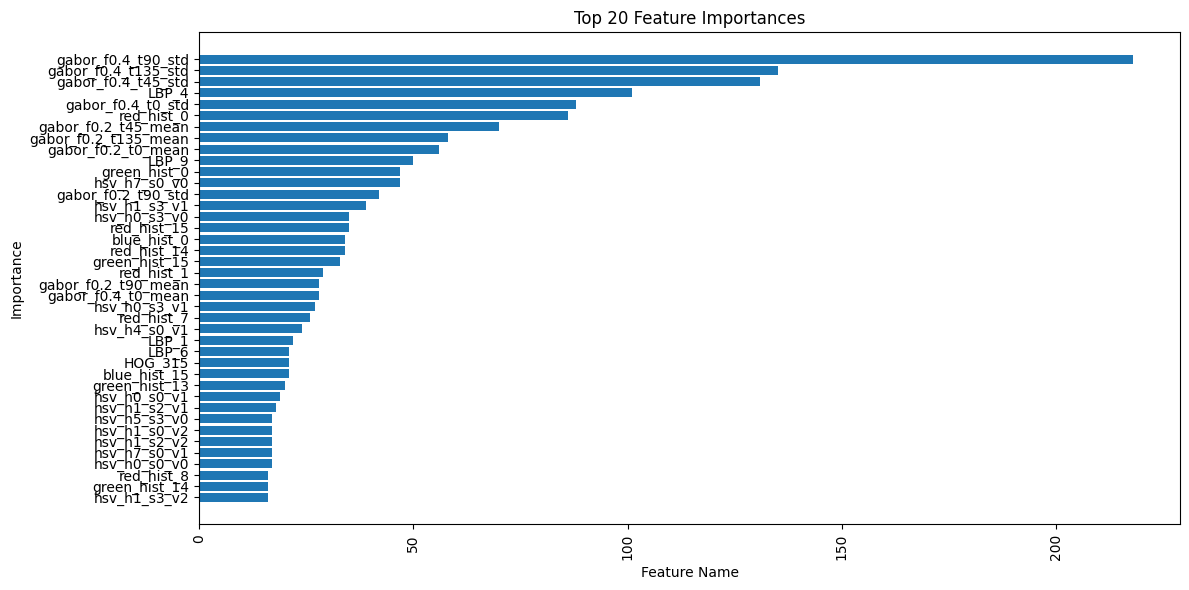

In [37]:
import numpy as np

import matplotlib.pyplot as plt

importances = best_model.feature_importances_

# Get indices of top 20 importances
top_idx = np.argsort(importances)[-40:]
top_features = [feature_cols[i] for i in top_idx]
top_importances = importances[top_idx]

plt.figure(figsize=(12, 6))
plt.barh(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()


In [40]:
FEATURE_SETS_ABLATION = {
    "Gabor+Color": GABOR_ONLY_COLS + COLOR_ONLY_COLS,
    "All_noLBP": HOG_ONLY_COLS + GABOR_ONLY_COLS + COLOR_ONLY_COLS,
    "All_noHOG": LBP_ONLY_COLS + GABOR_ONLY_COLS + COLOR_ONLY_COLS,
    "All_noGabor": LBP_ONLY_COLS + HOG_ONLY_COLS + COLOR_ONLY_COLS,
    "All_noColor": LBP_ONLY_COLS + HOG_ONLY_COLS + GABOR_ONLY_COLS,
}

In [41]:
for feature_set_name, feature_cols in FEATURE_SETS_ABLATION.items():
    print("=" * 50)
    print(f"Running experiments for feature set: {feature_set_name}")
    print("=" * 50)
    X_train = df_all_train[feature_cols]
    X_test = df_all_test[feature_cols]
    y_train = df_all_train["label"]
    y_test = df_all_test["label"]
    X_train, y_train = shuffle_indexes(X_train, y_train)
    run_ml_experiments(
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        path_output=Path("outputs/"),
        feature_set_name=feature_set_name,
    )

Running experiments for feature set: Gabor+Color

--------------------------------------------------
GaussianNB:
Training time: 0.12 seconds for 100000 samples
Prediction time: 0.05 seconds for 20000 samples
Model size (joblib): 0.004 MB
              precision    recall  f1-score   support

        Real     0.7914    0.5090    0.6195     10000
        Fake     0.6381    0.8658    0.7347     10000

    accuracy                         0.6874     20000
   macro avg     0.7147    0.6874    0.6771     20000
weighted avg     0.7147    0.6874    0.6771     20000


--------------------------------------------------
KNeighborsClassifier:
Training time: 0.04 seconds for 100000 samples
Prediction time: 2.56 seconds for 20000 samples
Model size (joblib): 18.190 MB
              precision    recall  f1-score   support

        Real     0.7697    0.7871    0.7783     10000
        Fake     0.7822    0.7645    0.7732     10000

    accuracy                         0.7758     20000
   macro avg     